   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


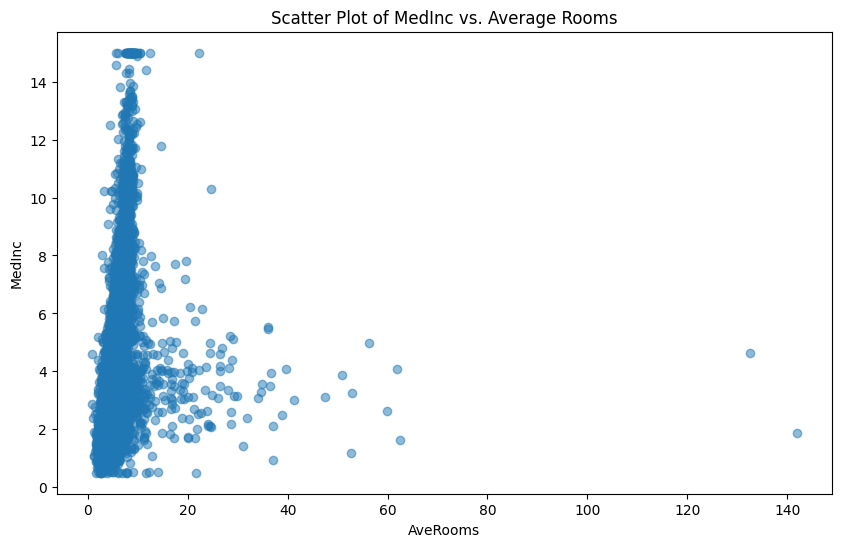

Mean Squared Error (Linear Regression): 1.2923314440807299
Mean Squared Error (Lasso): 1.291723534870796
Mean Squared Error (Ridge): 1.2923314411431166


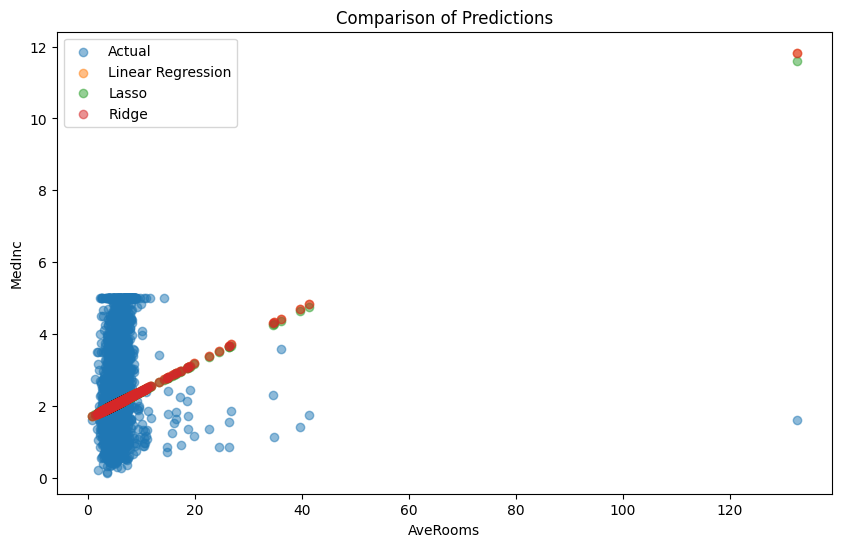

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing(as_frame=True)

# Convert the dataset to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first few rows of the dataset
print(df.head())

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df["AveRooms"], df["MedInc"], alpha=0.5)
plt.title("Scatter Plot of MedInc vs. Average Rooms")
plt.xlabel("AveRooms")
plt.ylabel("MedInc")
plt.show()

# Split the data into training and testing sets
X = df[["AveRooms"]]  # Feature
y = data.target  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Create and fit the Lasso regression model (L1 regularization)
alpha_lasso = 0.01  # Adjust the regularization strength
model_lasso = Lasso(alpha=alpha_lasso)
model_lasso.fit(X_train, y_train)

# Create and fit the Ridge regression model (L2 regularization)
alpha_ridge = 0.01  # Adjust the regularization strength
model_ridge = Ridge(alpha=alpha_ridge)
model_ridge.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

# Calculate mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Mean Squared Error (Linear Regression): {mse_lr}")
print(f"Mean Squared Error (Lasso): {mse_lasso}")
print(f"Mean Squared Error (Ridge): {mse_ridge}")

# Visualization of the models
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(X_test, y_pred_lasso, alpha=0.5, label="Lasso")
plt.scatter(X_test, y_pred_ridge, alpha=0.5, label="Ridge")

plt.title("Comparison of Predictions")
plt.xlabel("AveRooms")
plt.ylabel("MedInc")
plt.legend()
plt.show()
